In [9]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ls

README.md               freesurfer_summary.py   freesurfer_summary.pyc  graph prac.ipynb        plot.py


In [3]:
import freesurfer_summary

/Users/kcho/Dropbox/Knowledges/python/virtualEnv/lib/python2.7/site-packages/matplotlib/__init__.py:1256: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
cd ~/T1/FREESURFER/tmp/

/Users/kcho/T1/FREESURFER/tmp


In [5]:
ls

lh.insula.label  rh.insula.label  thick_kev.csv


In [6]:
df = pd.read_csv('thick_kev.csv')

In [7]:
df

,Unnamed: 0,subroi,thickness,side,std
0,0,lh_LPFC,2.400,lh,0.651
1,1,lh_LTC,2.887,lh,0.776
2,2,lh_MPFC,2.786,lh,0.651
3,3,lh_MTC,2.798,lh,0.720
4,4,lh_OCC,2.037,lh,0.631
5,5,lh_OFC,2.612,lh,0.840
6,6,lh_PC,2.361,lh,0.663
7,7,lh_SMC,2.383,lh,0.672
8,8,rh_LPFC,2.550,rh,0.620
9,9,rh_LTC,2.950,rh,0.749


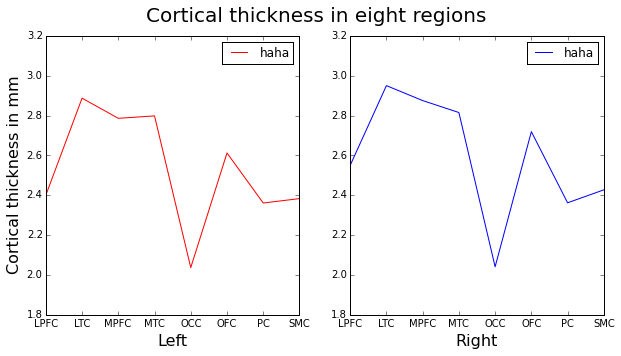

In [10]:
freesurfer_summary.draw_thickness(df,'haha')

In [16]:
df.head()
df['roi'] = df.subroi.str[3:]

In [21]:
gb = df.groupby('roi')
newDf = pd.concat([gb.get_group('LPFC'),
                   gb.get_group('OFC'),
                   gb.get_group('MPFC'),
                   gb.get_group('LTC'),
                   gb.get_group('MTC'),
                   gb.get_group('SMC'),
                   gb.get_group('PC'),
                   gb.get_group('OCC')])

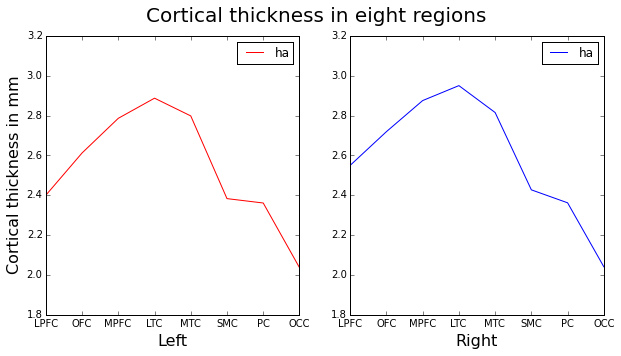

In [22]:
thicknessDf = newDf


subjName = 'ha'

gb = thicknessDf.groupby('side')
label = thicknessDf.subroi.str[3:].unique()

fig = plt.figure(figsize=(10,5))
fig.suptitle("Cortical thickness in eight regions", fontsize=20)
#plt.ylabel('Cortical thickness', fontsize=16)
#plt.xticks(range(len(label)), label)

lh_g = plt.subplot2grid((2,2),(0, 0), rowspan=2)
rh_g = plt.subplot2grid((2,2),(0, 1), rowspan=2)
#ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)
lh_g.plot(gb.get_group('lh')['thickness'],'r',label=subjName)
lh_g.set_xticklabels(label)
lh_g.set_xlabel('Left', fontsize=16)
lh_g.set_ylabel('Cortical thickness in mm', fontsize=16)
lh_g.set_ylim(1.8, 3.2)
lh_g.legend()


rh_g.plot(gb.get_group('rh')['thickness'],'b',label=subjName)
rh_g.set_xticklabels(label)
rh_g.set_xlabel('Right', fontsize=16)
rh_g.set_ylim(1.8, 3.2)
rh_g.legend()


In [13]:
lh_g.xaxis.set_zorder?